# 주제: 자전거 대여량 예측하기

따릉이 데이터


## 1. 라이브러리 및 데이터 불러오기
### (1) 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


### (2) 데이터 불러오기

In [2]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/aiffel/project/first-repository/Project_Assignment/aiffel/UBD/train.csv') 
test = pd.read_csv('/aiffel/aiffel/project/first-repository/Project_Assignment/aiffel/UBD/test.csv')
submission = pd.read_csv('/aiffel/aiffel/project/first-repository/Project_Assignment/aiffel/UBD/submission.csv')

## 2. 탐색적 데이터 분석

### (1) 데이터 확인하기

In [3]:
train.head() 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [4]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [8]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [9]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


In [10]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


### (2) 상관분석

<AxesSubplot:>

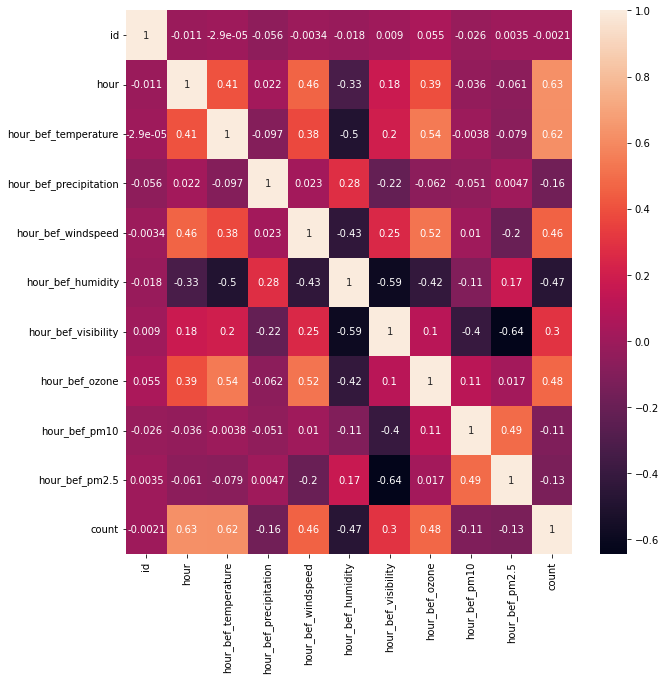

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot = True)
#count와 상관성이 높은 5개 피처 선택: 절대값이 0.4이상인 피처
#hour, hour_bef_tem, hour_bef_wind, hour_bef_humidity, hour_bef_ozone  

### (3) 피처 살펴보기 (id를 제외한 count에 대한 각각의 그래프)

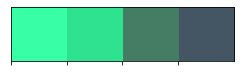

In [12]:
#따릉이 대표 색깔
sns.palplot(['#38FFA5','#2FE290','#447D64', '#445664'])
original_color=['#38FFA5','#2FE290','#447D64', '#445664']

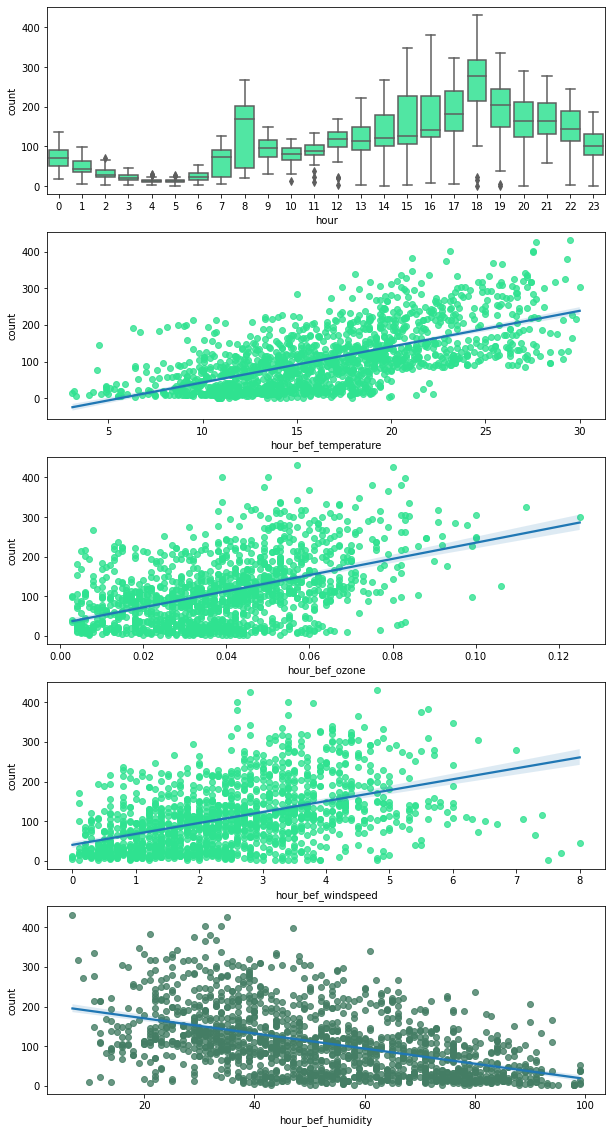

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
fig.set_size_inches(10, 20)

y = train["count"]
# 각 그래프에 데이터 추가
sns.boxplot(x=train["hour"], y=y, ax=ax1, color = '#38FFA5')
sns.regplot(x=train["hour_bef_temperature"], y=y, ax=ax2, scatter_kws={'color':'#2FE290'})
sns.regplot(x=train["hour_bef_ozone"], y=y, ax=ax3, scatter_kws={'color':'#2FE290'})
sns.regplot(x=train["hour_bef_windspeed"], y=y, ax=ax4, scatter_kws={'color':'#2FE290'})
sns.regplot(x=train["hour_bef_humidity"], y=y, ax=ax5, scatter_kws={'color':'#447D64'})
plt.show()

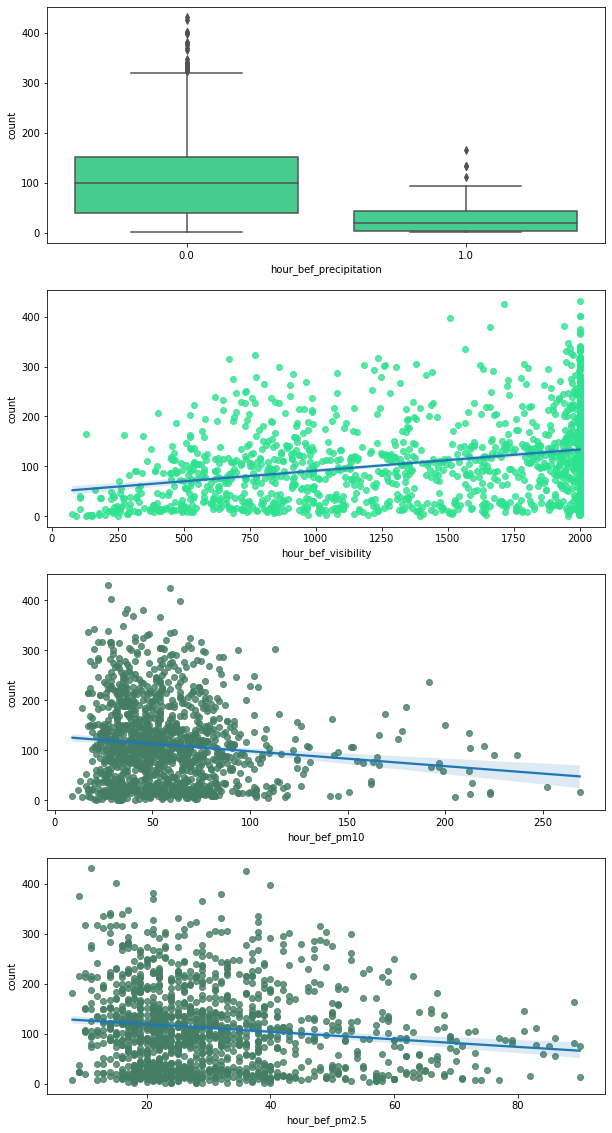

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
fig.set_size_inches(10, 20)

# 각 그래프에 데이터 추가
sns.boxplot(x=train["hour_bef_precipitation"], y=y, ax=ax1, color='#2FE290')
sns.regplot(x=train["hour_bef_visibility"], y=y, ax=ax2, scatter_kws={'color':'#2FE290'})
sns.regplot(x=train["hour_bef_pm10"], y=y, ax=ax3, scatter_kws={'color':'#447D64'})
sns.regplot(x=train["hour_bef_pm2.5"], y=y, ax=ax4, scatter_kws={'color':'#447D64'})
plt.show()

왜도 확인하고 왜도가 있는 열을 제외하고 해보기

In [15]:
# 왜도(skewness) 확인 메서드
train.skew()
#precipitation, windspeed, visibility, pm10, pm2.5 :가장 왜도가 심한 5개 피처

id                       -0.023450
hour                      0.003659
hour_bef_temperature      0.175224
hour_bef_precipitation    5.363369
hour_bef_windspeed        0.559761
hour_bef_humidity         0.149444
hour_bef_visibility      -0.484275
hour_bef_ozone            0.397303
hour_bef_pm10             2.385464
hour_bef_pm2.5            1.356688
count                     0.912534
dtype: float64

In [16]:
feature = ["hour", "hour_bef_temperature", "hour_bef_ozone", "hour_bef_humidity"]
y = train["count"]
train = train[feature]

#### 이번엔 왜도가 큰 값들을 제외하지 말고 정규화해서 포함시켜보기

In [17]:
train.describe()

,hour,hour_bef_temperature,hour_bef_ozone,hour_bef_humidity
count,1459.000000,1457.000000,1383.000000,1457.000000
mean,11.493489,16.717433,0.039149,52.231297
std,6.922790,5.239150,0.019509,20.370387
min,0.000000,3.100000,0.003000,7.000000
25%,5.500000,12.800000,0.025500,36.000000
50%,11.000000,16.600000,0.039000,51.000000
75%,17.500000,20.100000,0.052000,69.000000
max,23.000000,30.000000,0.125000,99.000000


In [249]:
#train['hour_bef_precipitation'] = train['hour_bef_precipitation'].astype('category')

In [250]:
train.skew()

id                       -0.023450
hour                      0.003659
hour_bef_temperature      0.175224
hour_bef_precipitation    5.363369
hour_bef_windspeed        0.559761
hour_bef_humidity         0.149444
hour_bef_visibility      -0.484275
hour_bef_ozone            0.397303
hour_bef_pm10             2.385464
hour_bef_pm2.5            1.356688
count                     0.912534
dtype: float64

In [251]:
#train[["hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_visibility", "hour_bef_pm10", "hour_bef_pm2.5"]] = np.log(train[["hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_visibility", "hour_bef_pm10", "hour_bef_pm2.5"]])

/opt/conda/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/conda/lib/python3.9/site-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


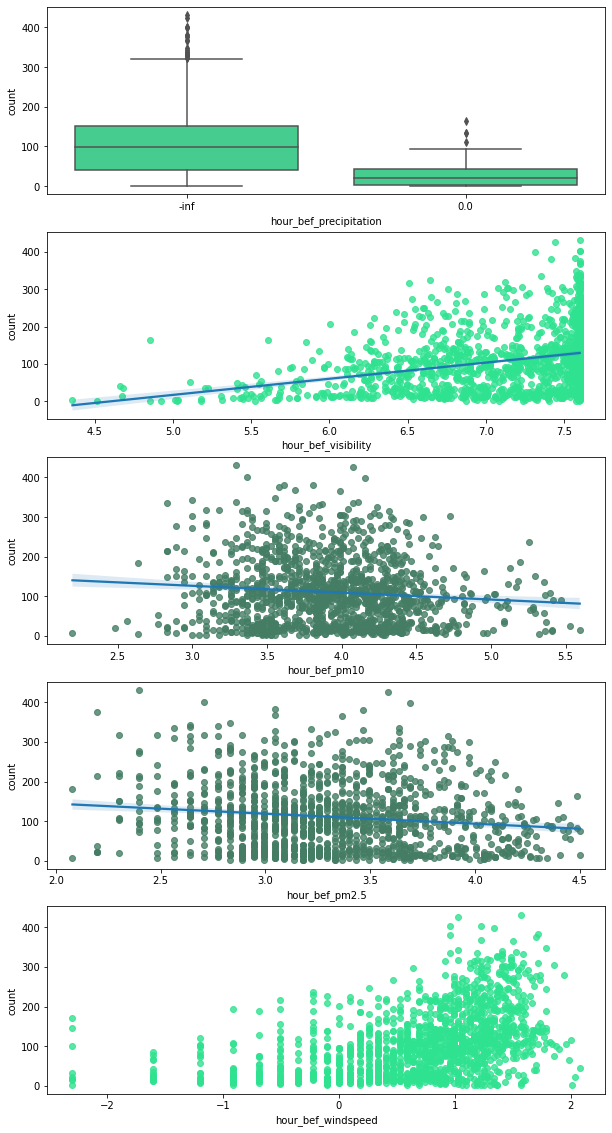

In [252]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
fig.set_size_inches(10, 20)

# 각 그래프에 데이터 추가
sns.boxplot(x=train["hour_bef_precipitation"], y=y, ax=ax1, color='#2FE290')
sns.regplot(x=train["hour_bef_visibility"], y=y, ax=ax2, scatter_kws={'color':'#2FE290'})
sns.regplot(x=train["hour_bef_pm10"], y=y, ax=ax3, scatter_kws={'color':'#447D64'})
sns.regplot(x=train["hour_bef_pm2.5"], y=y, ax=ax4, scatter_kws={'color':'#447D64'})
sns.regplot(x=train["hour_bef_windspeed"], y=y, ax=ax5, scatter_kws={'color':'#2FE290'})

plt.show()

In [253]:
#train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,0.0,0.405465,89.0,6.356108,0.027,4.330733,3.496508,49.0
1,6,13,20.1,-inf,0.336472,48.0,6.820016,0.042,4.290459,3.688879,159.0
2,7,6,13.9,-inf,-0.356675,79.0,7.231287,0.033,3.465736,2.944439,26.0
3,8,23,8.1,-inf,0.993252,54.0,6.852243,0.040,4.317488,4.158883,57.0
4,9,18,29.5,-inf,1.568616,7.0,7.600902,0.057,3.295837,2.397895,431.0


In [254]:
#train[np.isinf(train)] = np.nan

In [255]:
#np.isinf(train)

### (3) label분리와 train, test 데이터 결합하기(일단 제외시켜봄)

In [256]:
#y = train['count']
#train = train.drop('count', axis=1)
#train.shape

(1459, 10)

In [257]:
# raw_data = pd.concat([train,test], axis=0)
# raw_data.shape

### (4) 결측치 처리하기 - IterativeImputer(선형대치)

In [18]:
train.isna().sum()

hour                     0
hour_bef_temperature     2
hour_bef_ozone          76
hour_bef_humidity        2
dtype: int64

In [19]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [260]:
#train = train.drop('id', axis=1)
#train = train.drop('hour_bef_visibility', axis=1)

#test = test.drop('id', axis=1)
#test = test.drop('hour_bef_visibility', axis=1)

In [261]:
# raw_data.isna().sum()

In [262]:
#train

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,0.0,0.405465,89.0,0.027,4.330733,3.496508
1,13,20.1,NaN,0.336472,48.0,0.042,4.290459,3.688879
2,6,13.9,NaN,-0.356675,79.0,0.033,3.465736,2.944439
3,23,8.1,NaN,0.993252,54.0,0.040,4.317488,4.158883
4,18,29.5,NaN,1.568616,7.0,0.057,3.295837,2.397895
...,...,...,...,...,...,...,...,...
1454,4,16.8,NaN,0.470004,53.0,0.031,3.610918,3.295837
1455,3,10.8,NaN,1.335001,45.0,0.039,3.526361,2.944439
1456,5,18.3,NaN,0.641854,54.0,0.009,3.401197,3.044522
1457,21,20.7,NaN,1.308333,37.0,0.082,4.262680,3.583519


In [20]:
it_train = train.copy()
it_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hour                  1459 non-null   int64  
 1   hour_bef_temperature  1457 non-null   float64
 2   hour_bef_ozone        1383 non-null   float64
 3   hour_bef_humidity     1457 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 45.7 KB


In [21]:
it_train = train.copy()

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

it_train = train.copy()
it_train = IterativeImputer(random_state=2021).fit_transform(it_train)

itImp = pd.DataFrame(it_train)
column_names = train.columns
itImp.columns = column_names

In [23]:
itImp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hour                  1459 non-null   float64
 1   hour_bef_temperature  1459 non-null   float64
 2   hour_bef_ozone        1459 non-null   float64
 3   hour_bef_humidity     1459 non-null   float64
dtypes: float64(4)
memory usage: 45.7 KB


### (5) 이상치 처리하기 - Simplified Method (feat. IQR)

In [24]:
itImp_mid = itImp.copy()
col_name = list(itImp_mid.columns)

for lit in col_name:
    Q1 = itImp_mid[lit].quantile(0.25)
    Q3 = itImp_mid[lit].quantile(0.75)
    IQR = Q3-Q1
    train_delout = itImp_mid[(itImp_mid[lit]<(Q1 - 1.5*IQR))| (itImp_mid[lit]>(Q3 + 1.5*IQR))]
    itImp_mid = itImp_mid.drop(train_delout.index, axis=0)                         

In [25]:
itImp_mid.info()
#1264

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443 entries, 0 to 1458
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hour                  1443 non-null   float64
 1   hour_bef_temperature  1443 non-null   float64
 2   hour_bef_ozone        1443 non-null   float64
 3   hour_bef_humidity     1443 non-null   float64
dtypes: float64(4)
memory usage: 88.7 KB


In [26]:
itImp_mid.dropna(axis=0, inplace=True)

In [27]:
itImp_mid.isna().sum()

hour                    0
hour_bef_temperature    0
hour_bef_ozone          0
hour_bef_humidity       0
dtype: int64

### (6) 더미 추가하기

In [28]:
def busyHourGen(data, col):
    lst = data[col]
    lst_ = []
    for i in lst:
        if (6 < i <10) or (16 < i <20):
            lst_.append(1)
        else:
            lst_.append(0)
    data['busy_hour'] = lst_
    return data

In [29]:
an = busyHourGen(itImp_mid, 'hour')
an.head()

,hour,hour_bef_temperature,hour_bef_ozone,hour_bef_humidity,busy_hour
0,20.0,16.3,0.027,89.0,0
1,13.0,20.1,0.042,48.0,0
2,6.0,13.9,0.033,79.0,0
3,23.0,8.1,0.040,54.0,0
4,18.0,29.5,0.057,7.0,1


### (7) Polynomial

In [30]:
X = an
y = y.iloc[X.index]
#X = an[an.columns.difference(['count'])]
colls = X.columns.tolist()
X = np.column_stack((X['hour']**5, X['hour_bef_temperature']**4, X))

In [31]:
print(X.shape)
print(y.shape)

(1443, 7)
(1443,)


## 3. 모델링

In [37]:
from sklearn.model_selection import GridSearchCV

#파라미터 넣기
params = {'n_estimators': [400, 500, 507],\
    'max_depth': [13, 14, 15]
}

#파라미터 튜닝하고 결과값 데이터프레임으로 만드는 함수
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, \
                              scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE 값 계산 후 정렬
    results['RMSE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSE')

    return results

In [38]:
#y = y.values.ravel()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [39]:
model = ExtraTreesRegressor()
my_GridSearch(model, X, y, params, verbose=2, n_jobs=5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,max_depth,n_estimators,score,RMSE
0,13,400,-1809.698340,42.540549
1,13,500,-1815.636279,42.610284
2,13,507,-1817.559299,42.632843
3,14,400,-1829.277310,42.770052
5,14,507,-1830.989759,42.790066
4,14,500,-1833.527146,42.819705
7,15,500,-1849.424667,43.004938
6,15,400,-1853.397032,43.051098
8,15,507,-1857.844889,43.102725


In [41]:
X.shape

(1443, 7)

In [43]:
X_test.shape

(715, 7)

[CV] END .....................max_depth=13, n_estimators=400; total time=   6.4s
[CV] END .....................max_depth=13, n_estimators=500; total time=   7.8s
[CV] END .....................max_depth=13, n_estimators=600; total time=   8.1s
[CV] END .....................max_depth=14, n_estimators=400; total time=   6.6s
[CV] END .....................max_depth=14, n_estimators=500; total time=   7.8s
[CV] END .....................max_depth=14, n_estimators=600; total time=   7.6s
[CV] END .....................max_depth=15, n_estimators=400; total time=   5.8s
[CV] END .....................max_depth=15, n_estimators=500; total time=   9.0s
[CV] END .....................max_depth=15, n_estimators=600; total time=   8.3s
[CV] END .....................max_depth=13, n_estimators=400; total time=   6.0s
[CV] END .....................max_depth=13, n_estimators=500; total time=   7.6s
[CV] END .....................max_depth=13, n_estimators=600; total time=   8.6s
[CV] END ...................

[CV] END .....................max_depth=13, n_estimators=400; total time=   6.3s
[CV] END .....................max_depth=13, n_estimators=500; total time=   7.3s
[CV] END .....................max_depth=13, n_estimators=600; total time=   7.8s
[CV] END .....................max_depth=14, n_estimators=400; total time=   5.4s
[CV] END .....................max_depth=14, n_estimators=500; total time=   6.1s
[CV] END .....................max_depth=14, n_estimators=600; total time=   8.4s
[CV] END .....................max_depth=15, n_estimators=400; total time=   5.1s
[CV] END .....................max_depth=15, n_estimators=400; total time=   6.0s
[CV] END .....................max_depth=15, n_estimators=500; total time=   6.6s
[CV] END .....................max_depth=15, n_estimators=600; total time=   8.2s
[CV] END .....................max_depth=13, n_estimators=400; total time=   5.1s
[CV] END .....................max_depth=13, n_estimators=500; total time=   7.4s
[CV] END ...................

In [278]:
#기본 제공 파라미터
# params = {'n_estimators': 507,\
#     'max_depth': 14,\
#     'min_samples_split': 2,\
#     'min_samples_leaf': 1,\
#     'max_features': 'auto'
# }

In [54]:
#test 데이터 가공
it_test = test[test.columns.difference(['id', 'hour_bef_visibility'])].copy()
it_test = busyHourGen(it_test, 'hour')
it_test = it_test[colls]
X_test = np.column_stack((it_test['hour']**5, it_test['hour_bef_temperature']**4, it_test))
X_test = IterativeImputer(random_state = 2023).fit_transform(X_test)

#test 데이터 모델링
best_reg = ExtraTreesRegressor(n_estimators = 507, max_depth = 14, warm_start = True, random_state = 2023)
best_reg.fit(X, y)
pred = best_reg.predict(X_test)

In [56]:
pred

array([101.93293886, 212.01060158,  95.98637506,  41.42938856,
        92.25207784, 124.50086665,  83.29487179, 390.43458251,
        42.38593031, 175.418811  , 261.59239105, 263.73339908,
       104.6697398 ,  55.43620889, 169.11901709, 108.40141354,
        25.25589655, 215.70052993, 401.28796844, 172.31077187,
       143.82317596,  87.98307035,  29.79263809, 117.60437212,
       149.54058955,  97.08376068,  34.74373212,  92.89230024,
       127.93688363, 139.91864411,  75.11423406,  39.52114368,
        62.70517372, 142.63300634, 234.65159157,  50.43589744,
       125.69284305, 127.59664694, 185.85827933, 106.33925049,
        47.15450362, 109.2260449 , 157.7759175 ,  61.65078993,
       326.66469428, 203.39238919, 100.85601578,  61.92354509,
        13.97489366,  83.02953258, 201.10142998,  90.80988541,
       221.0295858 , 113.14960786, 131.14073893, 118.1606632 ,
        49.28285996, 140.0964175 ,  23.55449032,  14.87600673,
        96.4260355 ,  84.17896567, 274.21170283, 271.61

In [51]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [53]:
import optuna
from optuna.samplers import TPESampler

def objective_extratree(trial):
    params_et = {
      'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=1),
      'max_depth': trial.suggest_int('max_depth', 2, 20),
      'min_samples_split': trial.suggest_int('min_samples_split', 2, 4),
      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 3),
      'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', 4, 5, 6]),
      'warm_start': trial.suggest_categorical('warm_start', [True, False]),
      'random_state':2023
  }

    X=an.drop(columns='count')
    y = an[['count']]
    X_train_ori, X_val_ori, y_train_ori, y_val_ori = train_test_split(X, y, test_size=0.33, random_state=2023)
    model = ExtraTreesRegressor(**params_et)
    model.fit(X_train_ori, y_train_ori)

    pred = model.predict(X_val_ori)
    rmse = np.sqrt(mean_squared_error(y_val_ori, pred))
    return rmse

TypeError: dataclass_transform() got an unexpected keyword argument 'field_specifiers'

In [47]:
sampler = TPESampler(seed=2023)
study = optuna.create_study(
    study_name='et_optimizer',
    direction='minimize',
    sampler=sampler
)
study.optimize(objective_extratree, n_trials=30)

NameError: name 'TPESampler' is not defined

In [280]:
submission['count'] = pred
submission.to_csv('Extratree7.csv', index = False)

Extratree1: id, hour_bef_visibility 열 제외  
Extratree2: 위의 열 포함  
Extratree3: id, hour_bef_visibility 열 제외하고 GridSearch한 결과  
Extratree4: 왜도가 높은 열을 제외한 "hour", "hour_bef_temperature", "hour_bef_ozone", "hour_bef_humidity", "count"만 train, test에 남겨둠  
Extratree5: 4에서 max_depth만 13으로 바꿈 -> 오히려 나빠짐
Extratree6: 4에서 train에 count만 제거함-> 최저점 44.9점!!   
hour", "hour_bef_temperature", "hour_bef_ozone", "hour_bef_humidity"  
Extratree7: 왜도가 높은 열을 정규화 하여 11 id, visivility, count만 제외함  
(갑자기 드는 의문 hour_bef_precipitation는 0또는 1을 반환하는 카테고리인데 따로 처리해야하나?)